### Based on the papers 

**"Collective dynamics of small world networks" by Watts and Strogatz**

https://github.com/harshnova/Complex-Models/blob/master/papers/Collective-Dynamics-Of-Small-World-Networks.pdf

**"An Experimental Study of the Small World Problem" by Travers and Milgram**

https://github.com/harshnova/Complex-Models/blob/master/papers/An-Experimental-Study-Of-The-Small-World-Problem.pdf

In [445]:
import networkx as nx
import sys
import numpy as np

### Small World Property

Many real life phenomenon with graph representations, like social networks, have "Small world property", which means that average distance between nodes (the average number of edges on the shortest path between these nodes) is much less than expected.

### Glossary

**Milgram experiment** Analyzed people's obedience to authorities.

**Small world experiment** Analyzed structures of social networks.

**Regular graphs** All nodes have same number of neighbors.

**Degree of a regular graph** The number of neighbors of each node in a regular graph.

**Ring lattice** It is a kind of regular graph, chracterized by n (number of nodes) and k (degree) such that the k neighbors of a node are nearest neighbors.

**Clustering** Measure of how clique is a graph. A clique is a subset of nodes in which all nodes are connected to every other node. In social network, a clique is set of people who are all connected with each other. 

**Clustering coefficient** Likelihood that two nodes which are connected to one node, are also connected to each other.

**Path length** Measure of average distance between two nodes. Also called the degree of separation in social network.

**Generative models** Generative model explains a phenomenon by modeling a process that leads to that phenomenon.

### Small world experiment (Travers and Milgram):

Few randomly chosen people (subjects) in Kansas were sent a package. The package had a letter and instructions. The instructions asked the subjects to forward the enclosed letter to a person (targets) and their address in Massachusetts mentioned in the instruction with following conditions:

1) The letter should be forwarded by the subject to target only if the subject knew target directly.

2) If the subject did not know the target directly, the subject should forward the package to an intermediatery person who is most probable of knowing the target, along with same instructions.

Most letters were not forwarded by the subject. Out of the letters that were forwarded, roatated on an average between 6 people. So the average path length was found to be 6. This is called "six degrees of separation" in social networks.

### Small world experiment (Watts and Strogatz)

It was found that regular graphs have high clustering and high path length and random graph of same size has low clustering and low path length. A good social network graph should have high clustering and low path length. Therefore none of these two graphs are good models for social networks.

**Watts and Strogatz approach to build generative model for small world networks**

-- Build a regular graph with n nodes connected to k neighbors.

-- Choose a subset of edges and replace them with random edges.

The probability that an edge will be removed and a random edge is created is gives as _p_.

With p = 0, graph is regular and with p = 1, graph is completely random.

Small values of p produces high clustering and low path length graphs.

### Ring Lattice

Let us write a function to generate a ring lattice.

In [584]:
def build_ring_lattice(n,k):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i+1)
    nodes = list(G.nodes)
    edges = {}
    skew = not(k%2 == 0)
    k = k//2
    distances = []
    for i in range(-k, k):
        if(not(i==0)):
            distances.append(i)
    distances.append(k)
    if(skew):
        distances.append(k+1)
    for node in nodes:
        edges[node] = []
        for distance in distances:
            neighbor = node + distance                
            if(neighbor == 0):
                neighbor = max(nodes)
            if(neighbor < 0):
                neighbor = max(nodes) + neighbor
            if(neighbor > max(nodes)):
                neighbor = neighbor - max(nodes)
            edges[node].append(neighbor)
    for node in edges:
        for neighbor in edges[node]:
            G.add_edge(node, neighbor)
    k = k*2+int(skew)
    for node in edges:
        if(not(len(list(G.neighbors(node))) == k)):
            sys.stderr.write("ERROR!! Ring lattice is not possible in this configuration")
            break       
    return(G)

In [585]:
ring_lattice = build_ring_lattice(10,4)

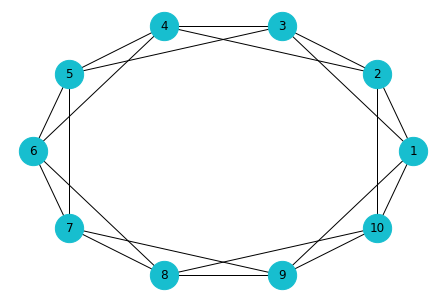

In [586]:
nx.draw_circular(ring_lattice, node_color = 'C9', node_size = 800, with_labels = True)

### Watts-Strogatz (WS) Graphs

Let us write a function to generate a WS graph.

In [587]:
def build_ws_graph(graph,p):
    nodes = list(graph.nodes)
    edges = list(graph.edges)
    for (node1, node2) in edges:
        if(p > np.random.random()):
            node2_n = np.random.choice([node for node in nodes if (not(node==node_2))])
            graph.remove_edge(node1, node2)
            graph.add_edge(node1, node2_n)
    return(graph)

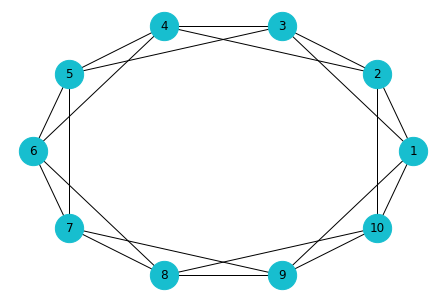

In [573]:
# WS Graph with p = 0.0
ws_graph_0 = build_ws_graph(ring_lattice, 0.0)
nx.draw_circular(ws_graph_0, node_color = 'C9', node_size = 800, with_labels = True)

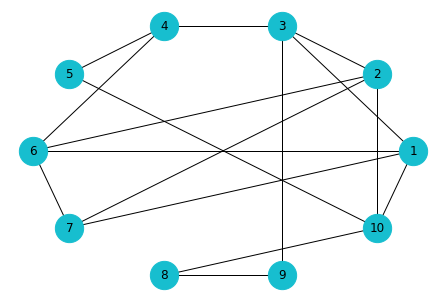

In [583]:
# WS Graph with p = 0.5
ws_graph_0p5 = build_ws_graph(ring_lattice, 0.5)
nx.draw_circular(ws_graph_0p5, node_color = 'C9', node_size = 800, with_labels = True)

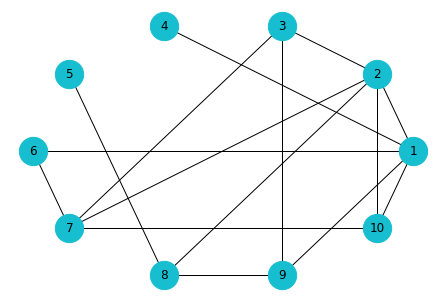

In [588]:
# WS Graph with p = 1.0
ws_graph_1p0 = build_ws_graph(ring_lattice, 1.0)
nx.draw_circular(ws_graph_1p0, node_color = 'C9', node_size = 800, with_labels = True)